In [55]:
import cranet
from cranet import Tensor
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## 利用 sklearn 生成线性可分数据

### 数据说明

通过 `sklearn.datasets.make_classification`生成数据

参数说明(数据信息):

- `n_samples`: 采样个数
- `n_features`: 数据类别
- `n_redundant`: redundant features 数量
- `n_informative`: informative features 数量
- `n_clusters_per_class`: 每个 class 中 cluster 数量
- `flip_y`: 随机交换样本的一段

### 如何生成线性可分的数据

sklearn 似乎没有直接支持生成线性可分数据的 API，这里我们通过一个循环不断生成数据并判断是否线性可分，若为判断为真则结束循环，否则循环继续

代码参考自[stackoverflow](https://stackoverflow.com/questions/47961536/how-to-generate-linear-separable-dataset-by-using-sklearn-datasets-make-classifi)


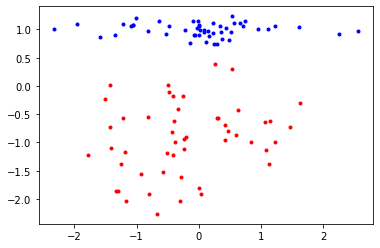

In [56]:
separable = False
while not separable:
    samples = datasets.make_classification(
        n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min()
                    or red[:, k].min() > blue[:, k].max() for k in range(2)])
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.show()

## update rule
假设$x, y$分别是数据和它们的标签

对于每一个 $x_i \in x, y_i \in y$:
$$
\begin{align*} 
w &\leftarrow w + \Delta w \\
b &\leftarrow b + \Delta b \\
 \text{where} \quad \Delta w &= \alpha \cdot (y_i - \hat{y_i}) \cdot x_i \\
                    \Delta b &= \alpha \cdot (y_i - \hat{y_i})
\end{align*}
$$

其中, $\alpha$是学习率, $\hat{y_i}$是$y_i$对应的预测值


In [57]:
class Perceptron:
    def __init__(self, *shape):
        """parameters initialization"""
        self.w = cranet.normal(shape, -1, 1)
        self.b = cranet.normal((shape[0]), -1, 1)

    def __call__(self, x):
        """linear output"""
        return self.w @ x + self.b

    def linear(self):
        """return a linear function"""
        w = self.w[0]
        return lambda x: (-w[0] * x - self.b) / w[1]

    def predict(self, X):
        """predict input"""

        return cranet.hardlim(self(X))

    def fit(self, X: Tensor, Y: Tensor, epochs=1000, lr=1e-1) -> None:
        """Perceptron Learning Algorithm"""

        for _ in range(epochs):
            # training phase
            for x, y in zip(X, Y):
                y_pred = self.predict(x)
                update = lr * (y - y_pred)

                self.w += update * x.T
                self.b += update


In [58]:
perceptron = Perceptron(1, 2)

In [59]:
def draw_line(model: Perceptron, draw_range=None, num_samples = 1000):
    """help function to display the output and original dataset"""
    if draw_range is None:
        draw_range = [-3, 3]
    x_numpy = np.linspace(*draw_range, num =num_samples)
    linear_func = model.linear()

    out = np.concatenate([linear_func(i).numpy() for i in x_numpy])
    # plt.figure(figsize=(4,4))
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])

    plt.plot(x_numpy, out, 'r.')
    plt.plot(red[:, 0], red[:, 1], 'r.')
    plt.plot(blue[:, 0], blue[:, 1], 'b.')

## 未训练

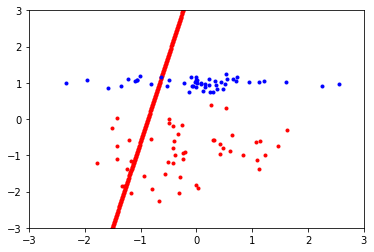

In [60]:
draw_line(perceptron, [-3, 3])

In [61]:
X, y = samples
print(X.shape, y.shape)
X_tensor = cranet.tensor(X)
y_tensor = cranet.tensor(y)
print(X_tensor.shape, y_tensor.shape)

(100, 2) (100,)
(100, 2) (100,)


## 训练

In [62]:
perceptron.fit(X_tensor, y_tensor)

## 训练后

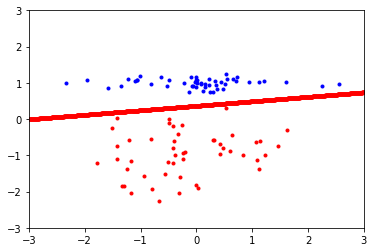

In [63]:
draw_line(perceptron, [-3, 3])